# <a id='toc1_'></a>[Data Modeling](#toc0_)

Name  
Topic  
email  
June 4th, 2023  


**Table of contents**<a id='toc0_'></a>    
- [Data Modeling](#toc1_)    
- [Setup](#toc2_)    
- [Model 1: Preparation, Initiation, and Evaluation](#toc3_)    
  - [Model 1: Hypothesis Formation](#toc3_1_)    
  - [Model 1: Assumptions](#toc3_2_)    
  - [Model 1: Initiation](#toc3_3_)    
  - [Model 1: Iteration](#toc3_4_)    
  - [Model 1: Evaluation](#toc3_5_)    
  - [Model 1: Efficiency Evaluation](#toc3_6_)    
  - [Model 1: Assessing Residuals](#toc3_7_)    
- [Key Findings](#toc4_)    
- [Recommendations](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Setup](#toc0_)

In [1]:
# Import all functions and classes from the module named 'my_code'
from custom_functions_and_libraries import *

# Set the random.seed(42)
np.random.seed(42)

# # import warnings
# warnings.filterwarnings('ignore')

Versions used in this notebook:
Python version: 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
Pandas version: 2.0.2
Numpy version: 1.23.4
Seaborn version: 0.12.2
Matplotlib version: 3.6.2
SKLearn version: 1.2.2


In [2]:
# Import the function to load the Iris dataset from sklearn.datasets
from sklearn.datasets import load_iris

# Load the Iris dataset into a variable called iris
iris = load_iris()

# Convert the Iris dataset into a pandas DataFrame. The data is contained in iris.data and the column names in iris.feature_names
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add a new column to the DataFrame for the target variable (the species of Iris flower). The target values are contained in iris.target
df['target'] = iris.target

# Display the first five rows of the DataFrame
df.sample(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1



# <a id='toc3_'></a>[Model 1: Preparation, Initiation, and Evaluation](#toc0_)

In this section, we will apply some machine learning models on the data.


## <a id='toc3_1_'></a>[Model 1: Hypothesis Formation](#toc0_)



## <a id='toc3_2_'></a>[Model 1: Assumptions](#toc0_)



## <a id='toc3_3_'></a>[Model 1: Initiation](#toc0_)



Here I created my X train and X test sets and y train and y test sets. 

In [3]:
# Split the iris dataset into a training set and a testing set
# The testing set is 20% of the total dataset, and the split is deterministic (i.e., always the same) because we set a random_state
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['target'])

# Create the feature matrix for the training set (X_train) by dropping the target column from train_df
# .copy() is used to ensure that changes made to X_train do not affect train_df
X_train = train_df.drop(columns=['target']).copy()

# Create the target vector for the training set (y_train) which is just the 'target' column from train_df
y_train = train_df['target'].copy()

# Similarly, create the feature matrix for the testing set (X_test) and the target vector for the testing set (y_test)
X_test = test_df.drop(columns=['target']).copy()
y_test = test_df['target'].copy()


Create a pipeline for each type of problem.

In [4]:
# (Optional) Directory for caching transformers
# cachedir = mkdtemp()

# Define the pipeline steps where each step is a tuple of (name, transform)
# Here, 'None' means that the steps are just placeholders and will be defined in the parameter grid
estimators = [('scaler', None),
            ('feature_selection', None),
            ('dim_reducer', None),
            ('model', None)]

# Create the pipeline object
pipe = Pipeline(estimators) #, memory=cachedir

# Define the advanced models for classification and regression
basic_classifier_models = [LogisticRegression(), DecisionTreeClassifier(), SVC(gamma='auto'), KNeighborsClassifier()]
basic_regression_models = [LinearRegression(), DecisionTreeRegressor(), SVR(gamma='auto'), KNeighborsRegressor()]


# # Define XGBRegressor with adjusted hyperparameters
# xgb_regressor = XGBRegressor(n_estimators=100,  # Reduce the number of trees
#                             max_depth=6,  # Reduce the depth of each tree
#                             subsample=0.9,  # Use a subsample of your data
#                             colsample_bytree=0.5,  # Use a subsample of your features
#                             n_jobs=1,  # Reduce parallelism
#                             tree_method='hist',  # Use the faster histogram method
#                             random_state=42)  # For reproducibility

# Replace XGBRegressor in your advanced_regression_models
advanced_regression_models = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]

# # Define XGBClassifier with adjusted hyperparameters
# xgb_classifier = XGBClassifier(n_estimators=100,  # Reduce the number of trees
#                             max_depth=6,  # Reduce the depth of each tree
#                             subsample=0.9,  # Use a subsample of your data
#                             colsample_bytree=0.5,  # Use a subsample of your features
#                             n_jobs=1,  # Reduce parallelism
#                             tree_method='hist',  # Use the faster histogram method
#                             random_state=42)  # For reproducibility

# Replace XGBClassifier in your advanced_classifier_models
advanced_classifier_models = [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]



In [5]:

# Define the parameter grid for the Grid Search
# Here, the grid consists of Standard Scaler for the 'scaler' step and all basic classification models for the 'model' step
param_grid = [{'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
            'model': advanced_classifier_models}]


## <a id='toc3_4_'></a>[Model 1: Iteration](#toc0_)



Here I conducted the grid search. To keep track of the time it takes to run each model search, I created a function to time the model's run time. I also created a dataframe to store the results of each model search.

In [6]:
# Capture the current time to measure the time taken by the grid search
start_time = time.time()

# Define a GridSearchCV object with the pipeline, parameter grid, and desired settings
grid = GridSearchCV(pipe, param_grid, return_train_score=True, 
                    cv=3, refit=True, verbose=2, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object to the data - this will perform the actual grid search
grid.fit(X_train, y_train)

# Calculate the total time taken for the grid search by subtracting the start time from the end time
end_time = time.time()
time_taken = end_time - start_time
print(f"Time taken for grid search: {time_taken} seconds")


Fitting 3 folds for each of 12 candidates, totalling 36 fits


Time taken for grid search: 2.9495387077331543 seconds


In [7]:
# Create a DataFrame with the results of the grid search
grid_outcomes = pd.DataFrame(grid.cv_results_).apply(lambda x: x.astype(str) if x.dtype == 'object' else x)
display(grid_outcomes.head())

# Get the best grid search's best predicted probabilities
best_model = grid.best_estimator_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.182065,0.005717,0.015217,0.001780,RandomForestClassifier(),StandardScaler(),"{'model': RandomForestClassifier(), 'scaler': StandardScaler()}",0.971429,0.942857,0.942857,0.952381,0.013469,1,1.000000,1.0,1.000000,1.000000,0.000000
1,0.175613,0.012852,0.012672,0.002056,RandomForestClassifier(),MinMaxScaler(),"{'model': RandomForestClassifier(), 'scaler': MinMaxScaler()}",0.971429,0.942857,0.942857,0.952381,0.013469,1,1.000000,1.0,1.000000,1.000000,0.000000
2,0.179972,0.015884,0.014338,0.000942,RandomForestClassifier(),RobustScaler(),"{'model': RandomForestClassifier(), 'scaler': RobustScaler()}",0.971429,0.942857,0.942857,0.952381,0.013469,1,1.000000,1.0,1.000000,1.000000,0.000000
3,0.174969,0.009539,0.018174,0.004091,RandomForestClassifier(),None,"{'model': RandomForestClassifier(), 'scaler': None}",0.971429,0.942857,0.942857,0.952381,0.013469,1,1.000000,1.0,1.000000,1.000000,0.000000
4,0.085867,0.004498,0.009670,0.000942,AdaBoostClassifier(),StandardScaler(),"{'model': AdaBoostClassifier(), 'scaler': StandardScaler()}",0.971429,0.885714,0.942857,0.933333,0.035635,10,0.971429,1.0,0.985714,0.985714,0.011664


In [8]:
# Filter the columns based on the regex pattern
filtered_columns = grid_outcomes.filter(regex=r'^param_', axis=1).columns

# Parameters of the best model
results1 = grid_outcomes.loc[grid_outcomes.mean_test_score.argmax(), filtered_columns].sort_index().to_dict()

# Append the other results to the list
results2 = {
    'score_method': grid.scoring,
    'train_score_average': grid_outcomes.loc[grid.best_index_, 'mean_train_score'],
    'validation_score_average': grid_outcomes.loc[grid.best_index_, 'mean_test_score'],
    'test_score_actual': grid.score(X_test, y_test),
    'n_splits': grid.n_splits_,
    'mean_fit_time': grid_outcomes.loc[grid.best_index_, 'mean_fit_time'],
    'mean_score_time': grid_outcomes.loc[grid.best_index_, 'mean_score_time'],
    'refit_time': grid.refit_time_,
    'total_search_time': time_taken
}

results1.update(results2)

# Convert the results to a DataFrame
best_model_results = pd.Series(results1)

best_model_results



param_model                 RandomForestClassifier()
param_scaler                        StandardScaler()
score_method                                accuracy
train_score_average                              1.0
validation_score_average                    0.952381
test_score_actual                           0.888889
n_splits                                           3
mean_fit_time                               0.182065
mean_score_time                             0.015217
refit_time                                  0.098532
total_search_time                           2.949539
dtype: object

## <a id='toc3_5_'></a>[Model 1: Evaluation](#toc0_)



Here I visualize the impact of shifting the hyperparameters on the accuracy of the model. I also visualize the confusion matrix and printed out the classification report.

Here I created two functions that I will use repeatedly throughout this notebook to evaluate the models performance.

In [9]:
print(grid_outcomes.columns)
first_hyperparameter = 'param_model'
second_hyperparameter = 'param_scaler'
pipe_plot_name = 'Models'

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_model', 'param_scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')


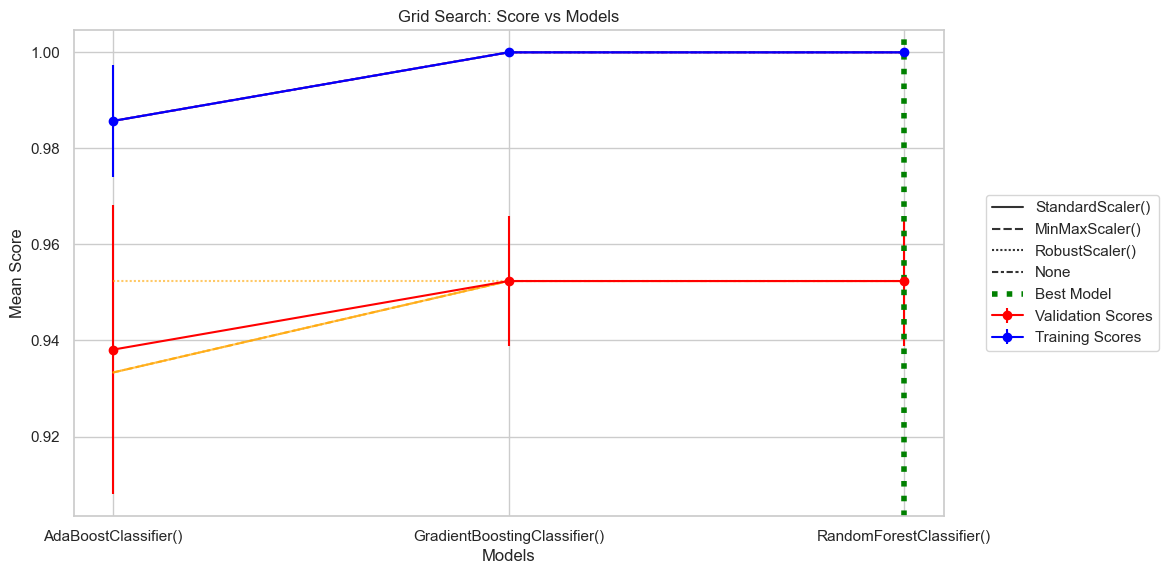

In [10]:

# Call the function with your actual data
plot_average_score_of_hyperparameters(grid_outcomes, first_hyperparameter, 
                variable_plot_name=pipe_plot_name, second_hyperparameter=second_hyperparameter)


### Accuracy: 
 The model's accuracy is **88.9%**

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,15.000000
1,0.777778,0.933333,0.848485,15.000000
2,0.916667,0.733333,0.814815,15.000000
macro avg,0.898148,0.888889,0.887767,45.000000
weighted avg,0.898148,0.888889,0.887767,45.000000


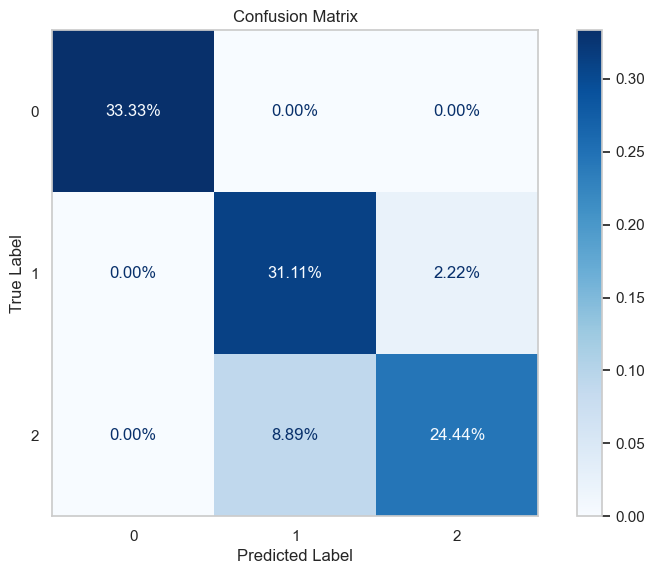

In [11]:
prediction_evaluations(best_model, X_test=X_test, y_test=y_test)

confusion_matrix_plot(best_model, X_test, y_test, [0, 1, 2])


## <a id='toc3_6_'></a>[Model 1: Efficiency Evaluation](#toc0_)




Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_model', 'param_scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')


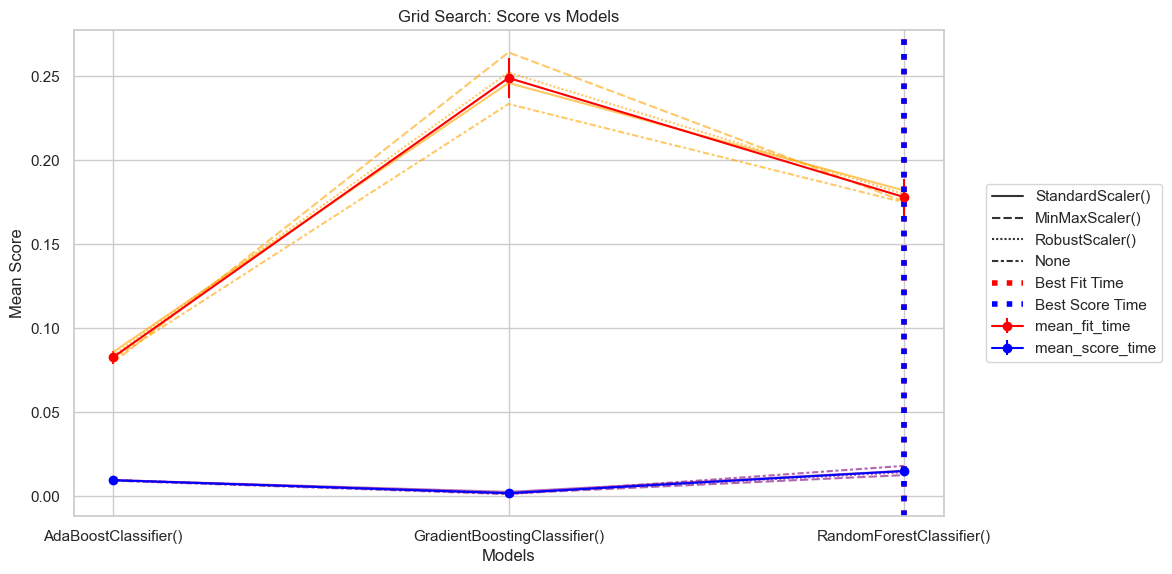

In [12]:
print(grid_outcomes.columns)
first_hyperparameter = 'param_model'
second_hyperparameter = 'param_scaler'
pipe_plot_name = 'Models'

plot_average_time_of_hyperparameters(grid_outcomes, first_hyperparameter, pipe_plot_name, second_hyperparameter=second_hyperparameter)

In [13]:
# cum_sum_variance_explained = best_model.named_steps['dim_reducer'].explained_variance_ratio_.cumsum()
# pca_component = range(1, len(cum_sum_variance_explained) + 1)

# plt.figure(figsize=(10, 6))
# sns.lineplot(x=pca_component, y=cum_sum_variance_explained, color='b', linewidth=2)

# plt.title("Cumulative Explained Variance by Principal Components", fontsize=16)
# plt.xlabel("Number of Principal Components", fontsize=12)
# plt.ylabel("Cumulative Explained Variance", fontsize=12)

# plt.xticks(range(1, len(pca_component) + 1, 5), fontsize=10)
# plt.yticks(fontsize=10)

# plt.tight_layout()
# plt.show()



## <a id='toc3_7_'></a>[Model 1: Assessing Residuals](#toc0_)


**Independence and Identically Distributed Test**

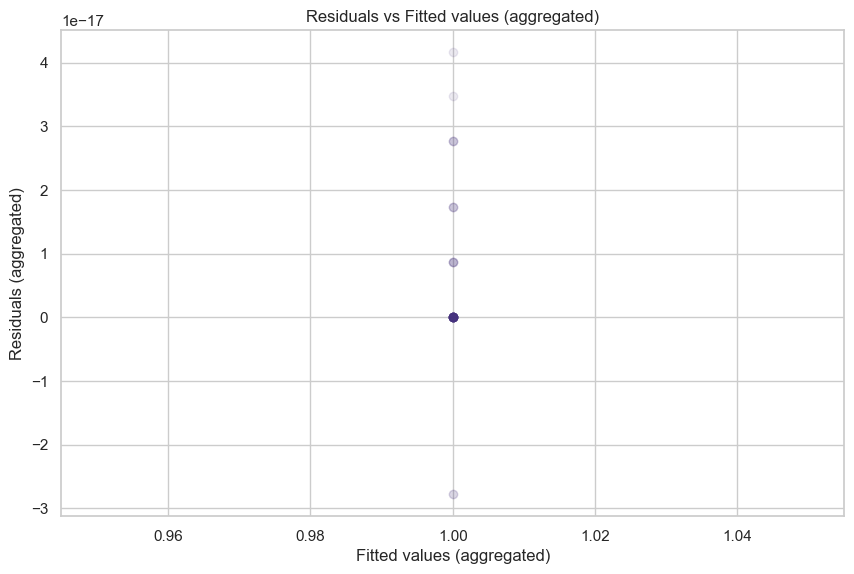

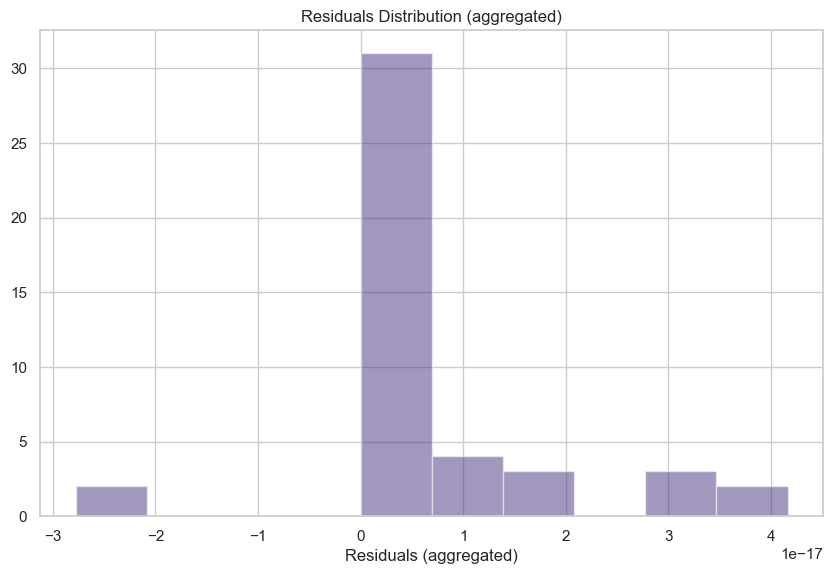

Durbin-Watson statistic (aggregated): 1.841867469879518


In [14]:
def visualize_residuals(model, X_test, y_test, aggregate=False):
    # Compute predicted probabilities
    y_pred_proba = model.predict_proba(X_test)

    residuals = []

    # compute residuals for each class
    for i in range(y_pred_proba.shape[1]):
        # Treat each class as binary outcome
        y_test_binary = (y_test == i).astype(int)
        
        # Compute residuals
        residuals_i = y_test_binary - y_pred_proba[:, i]
        residuals.append(residuals_i)
        
    residuals = np.array(residuals)

    if aggregate:
        # Aggregate residuals across all classes
        residuals_agg = residuals.sum(axis=0)

        # Plot aggregated residuals
        plt.scatter(y_pred_proba.sum(axis=1), residuals_agg, alpha=0.1)
        plt.xlabel('Fitted values (aggregated)')
        plt.ylabel('Residuals (aggregated)')
        plt.title('Residuals vs Fitted values (aggregated)')
        plt.show()

        # Plot aggregated residuals distribution
        plt.hist(residuals_agg, alpha=0.5)
        plt.xlabel('Residuals (aggregated)')
        plt.title('Residuals Distribution (aggregated)')
        plt.show()

        # Perform Durbin-Watson test
        dw = durbin_watson(residuals_agg)
        print('Durbin-Watson statistic (aggregated):', dw)

    else:
        # Plot residuals for each class
        for i in range(residuals.shape[0]):
            plt.scatter(y_pred_proba[:, i], residuals[i, :], alpha=0.1)
            plt.xlabel('Fitted values for class '+str(i))
            plt.ylabel('Residuals')
            plt.title('Residuals vs Fitted values for class '+str(i))
            plt.show()

            # Plot residuals distribution
            plt.hist(residuals[i, :], alpha=0.5)
            plt.xlabel('Residuals for class '+str(i))
            plt.title('Residuals Distribution for class '+str(i))
            plt.show()

            # Perform Durbin-Watson test
            dw = durbin_watson(residuals[i, :])
            print('Durbin-Watson statistic for class '+str(i)+':', dw)

visualize_residuals(best_model, X_test, y_test, aggregate=True)

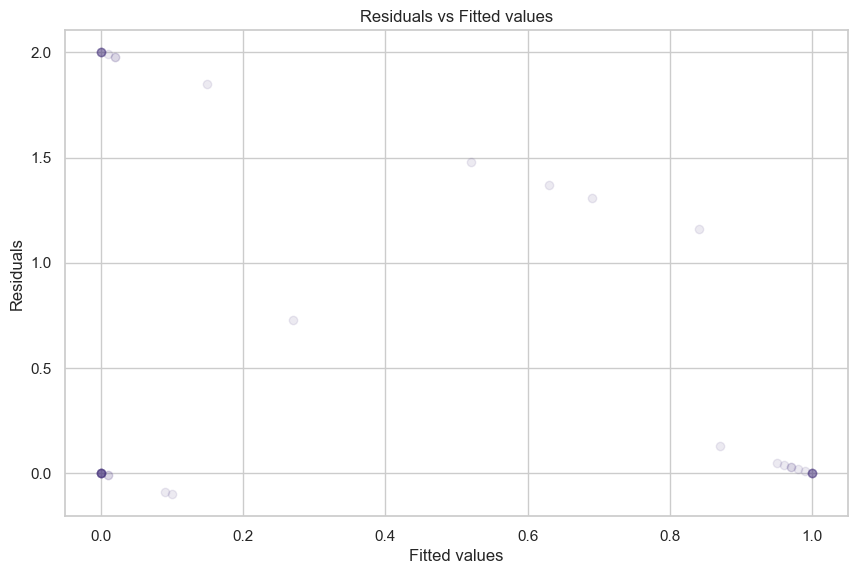

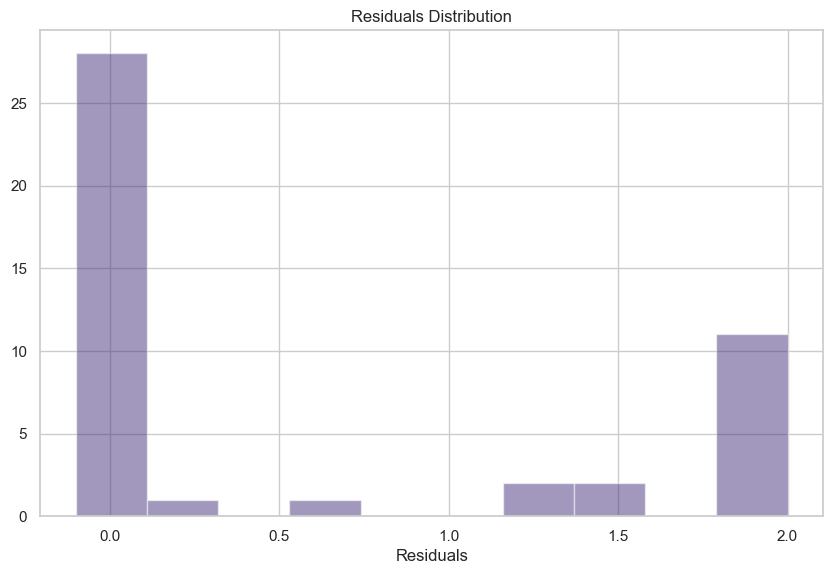

Durbin-Watson statistic: 1.2912704287910712


In [15]:
# Compute predicted probabilities
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute residuals
residuals = y_test - y_pred_proba

# Plot residuals
plt.scatter(y_pred_proba, residuals, alpha=0.1)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Plot residuals
plt.hist(residuals, alpha=0.5)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

# Perform Durbin-Watson test
dw = durbin_watson(residuals)
print('Durbin-Watson statistic:', dw)

These two visual tests show that the distribution of the residuals is normally distributed and appears to be independent of the fitted values. Furthermore, the Durbin-Watson of the residuals is close to 2, which indicates that there is very little to no autocorrelation in the residuals. Therefore we can conclude that the residuals are not correlated with each other and the distribution of the residuals is not dependent on the predicted probability of the target class. This means that this model meets the assumption of independence and identically distributed. 



# <a id='toc4_'></a>[Key Findings](#toc0_)

Summarize the findings from the analyses.



# <a id='toc5_'></a>[Recommendations](#toc0_)

List number of actionables based on the findings.